In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.MStorch import MultiSlice, LARBED
from src.util import toCPU, toGPU, device, SimulationCell
import sys
sys.path.append(r'C:\Users\hcni2\Box\ZuoLab\tool_scripts')
from wfRead import readPhaseGrating


using cuda:0
using torch.float32


In [2]:
! zmult64 110_P.ms -output 1


 ELECTRON DIFFRACTION BY MULTISLICE METHOD
 J.M. ZUO, UIUC, 2005 and modified 2007 & 2008

 Input file : 110_P.ms    
  
 Title : _sf _file _cor _new _abs
  
 INPUT FLAGS:
  
 FILE (1 to use file for atomic coords) :            1
 XYZ  (1 to use xyz format) :            0
 NEW  (1 to use input without dw) :            1
 ABS  (1 to include mean absorption) :            1
 COR  (1 to include C5 and other aberr) :            1
 SF   (1 to use default table) :            1
 AUTO (1 to use autoslice) :            0
 PAR  (1 to read a list of TEM parameters) :            1

 THE 2-D CELL OF THE DIRECT SPACE IS DEFINED BY 
        a =    103.90583
        b =    100.54134
    gamma =  90.00000
    caxis = 402.16537

  Number of Atoms :       204478
  

 THERE ARE   204478 ATOMS IN THE CELL, THEY ARE
  1  0.066908  0.596267  0.000362 1.0000
  1  0.449917  0.193205  0.000845 1.0000
  1  0.449171  0.461648  0.001327 1.0000
  1  0.183838  0.923473  0.001528 1.0000
  1  0.329272  0.520131  0.004

In [3]:
# si_pg = np.fromfile(r'test\Si\Si110_20x14x50.img', dtype=np.complex64, offset=8).reshape(-1,1024,1024)#[:,256:768,256:768]
si_pg = readPhaseGrating(r'temp.pg', (1024, 1024), 200)
simCell = SimulationCell(1024, 1024, 108.6, 107.5088, 90.0000)
probe = torch.ones((1024,1024), dtype=torch.complex64, device=device)
i,j = np.mgrid[-3:4,-3:4]
beams = tuple(zip(i.flatten(), j.flatten()))
larbed = LARBED(simCell, zStep=7.6792/4, nSlice=200, kV=300, nTilt=30, tiltStep=4, potential=toGPU(si_pg), tilt=(0,0), beams=beams).to(device)

c:\Users\hcni2\.conda\envs\torch\lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


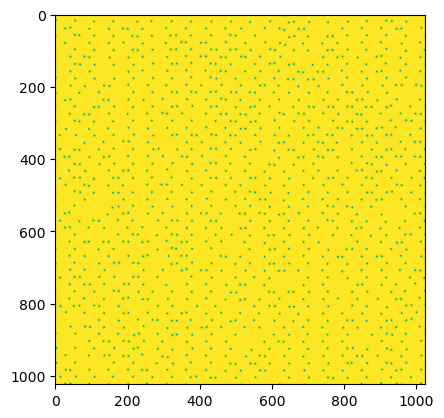

In [4]:
plt.imshow(si_pg[25].real)

In [5]:
plt.imshow((larbed.SAED), vmin=1e7, vmax=1e9)

AttributeError: 'LARBED' object has no attribute 'SAED'

vector1(red): [-26 -19]
self.vector2(blue): [-26  19]


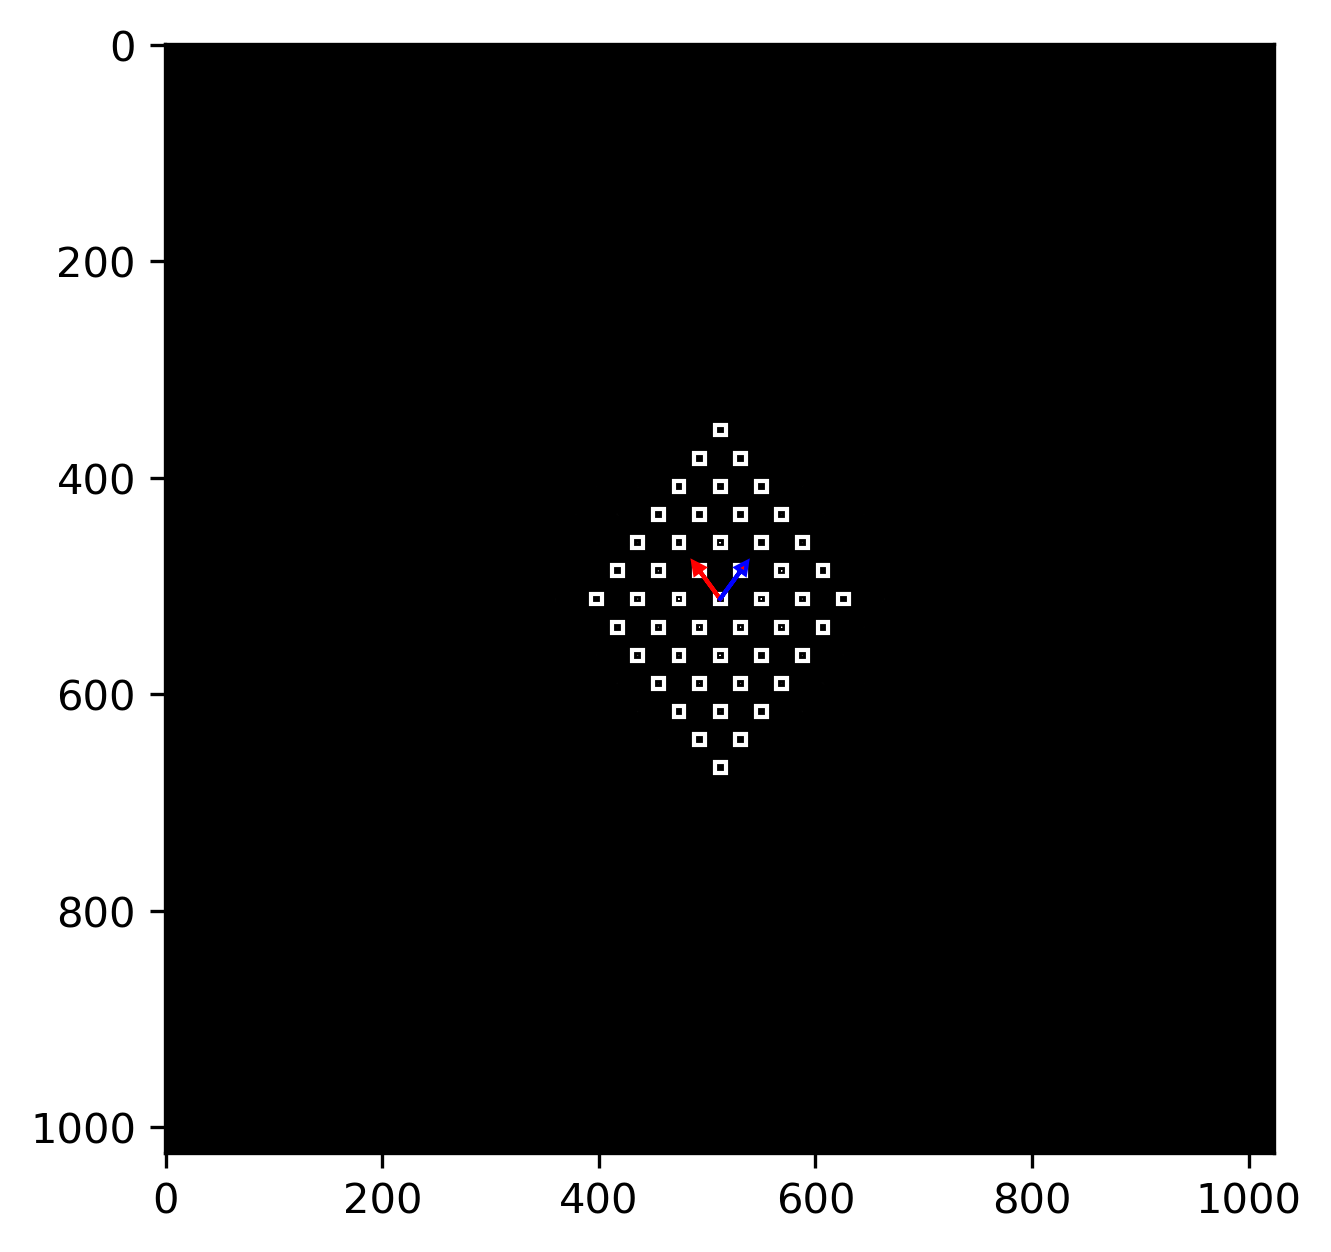

In [6]:
larbed.findLattice(threshold=1e10)
larbed.setIndices(np.array([1,-1,-1]), np.array([1,-1,1]))


In [6]:
with torch.no_grad():
    sim = larbed(probe)
sim = toCPU(sim)

In [4]:
sim = np.load(r'C:\Users\hcni2\Box\ZuoLab\active dopant\LARBED\simulation\P2V_couple\P2V3percent_Pinfixcol_uprightNN.npy')

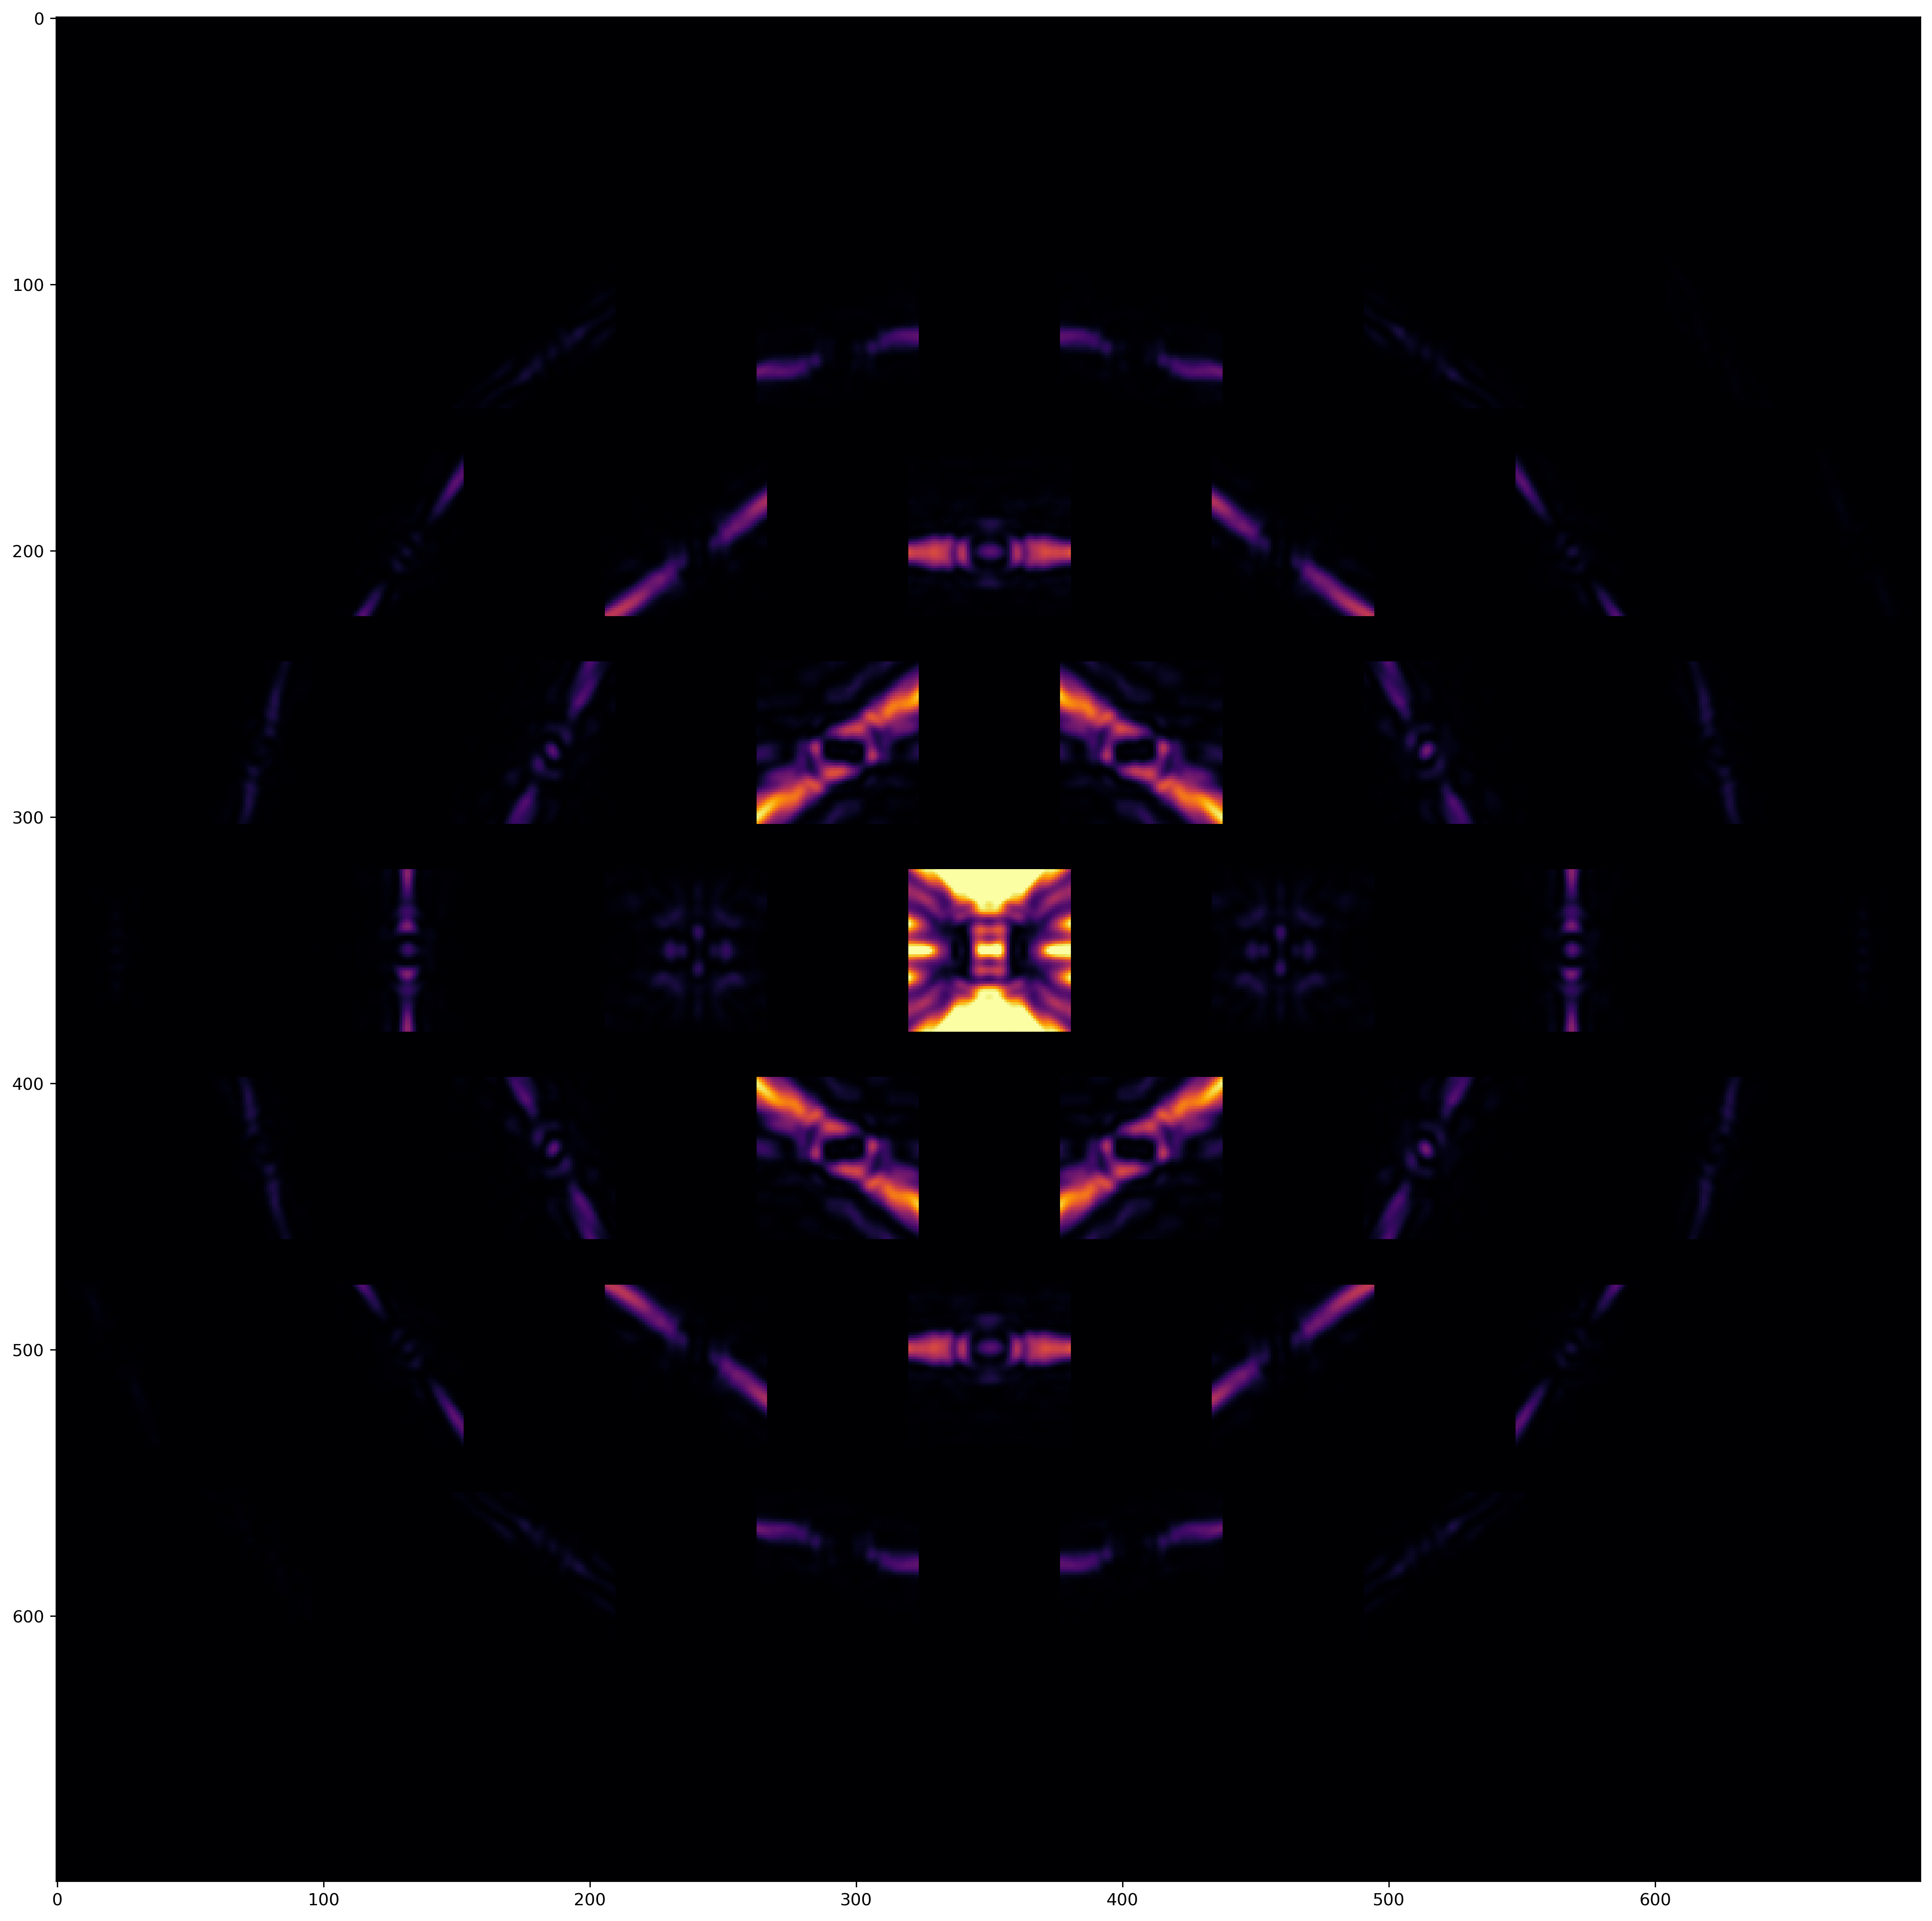

In [7]:
# Create a blank canvas
canvas_size = (1100, 1100)  # Adjust the size as needed
canvas = np.zeros(canvas_size)

# Place each beam's simulation result onto the canvas
for idx, (beam, s) in enumerate(zip(beams, sim)):
    x, y = beam
    point = x*larbed.vector1 + y*larbed.vector2  
    point *= 3
    point += np.array(canvas_size)//2
    canvas[point[0]-larbed.nTilt:point[0]+larbed.nTilt+1, point[1]-larbed.nTilt:point[1]+larbed.nTilt+1] = s

# Plot the canvas
plt.figure(figsize=(20, 20), dpi=300)
plt.imshow(canvas[200:900,200:900], cmap='inferno', vmax=5e11)
# plt.colorbar()
# plt.title('Simulation Results on Canvas')
# plt.savefig(r'C:\Users\hcni2\Box\ZuoLab\active dopant\LARBED\simulation\P4V_couple\P4V_P3percent_distribution0.1%_strain.png')


In [15]:
np.save(r"C:\Users\hcni2\Box\ZuoLab\active dopant\LARBED\simulation\P4V_couple\P4V_P3percent_distribution0.1%_strain.npy", sim)

In [12]:
np.save(r"C:\Users\hcni2\Box\ZuoLab\active dopant\LARBED\simulation\larbed_indices.npy", larbed.indices)

In [6]:
for idx, beam in enumerate(larbed.indices):
    print(idx, beam)
    

0 [-6  6  0]
1 [-5  5  1]
2 [-4  4  2]
3 [-3  3  3]
4 [-2  2  4]
5 [-1  1  5]
6 [0 0 6]
7 [-5  5 -1]
8 [-4  4  0]
9 [-3  3  1]
10 [-2  2  2]
11 [-1  1  3]
12 [0 0 4]
13 [ 1 -1  5]
14 [-4  4 -2]
15 [-3  3 -1]
16 [-2  2  0]
17 [-1  1  1]
18 [0 0 2]
19 [ 1 -1  3]
20 [ 2 -2  4]
21 [-3  3 -3]
22 [-2  2 -2]
23 [-1  1 -1]
24 [0 0 0]
25 [ 1 -1  1]
26 [ 2 -2  2]
27 [ 3 -3  3]
28 [-2  2 -4]
29 [-1  1 -3]
30 [ 0  0 -2]
31 [ 1 -1 -1]
32 [ 2 -2  0]
33 [ 3 -3  1]
34 [ 4 -4  2]
35 [-1  1 -5]
36 [ 0  0 -4]
37 [ 1 -1 -3]
38 [ 2 -2 -2]
39 [ 3 -3 -1]
40 [ 4 -4  0]
41 [ 5 -5  1]
42 [ 0  0 -6]
43 [ 1 -1 -5]
44 [ 2 -2 -4]
45 [ 3 -3 -3]
46 [ 4 -4 -2]
47 [ 5 -5 -1]
48 [ 6 -6  0]


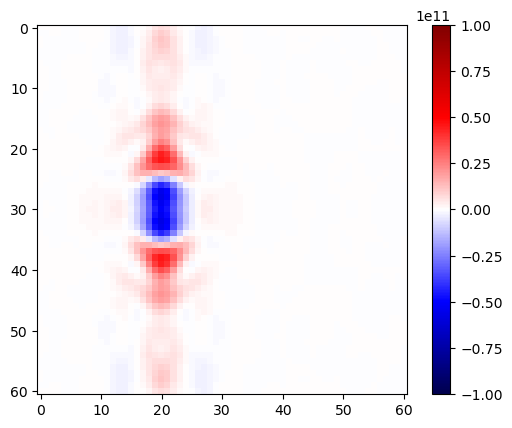

In [7]:
plt.imshow(sim[12] - np.fliplr(sim[36]), cmap='seismic', vmax=1e11, vmin=-1e11)
plt.colorbar()

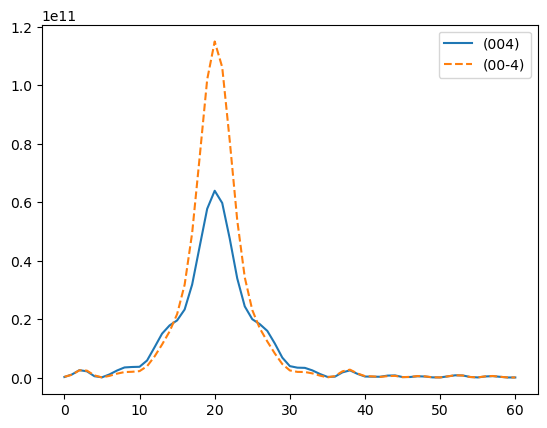

In [8]:
plt.plot(sim[12,30], label='(004)')
plt.plot(np.fliplr(sim[36])[30], '--',label='(00-4)')
plt.legend()

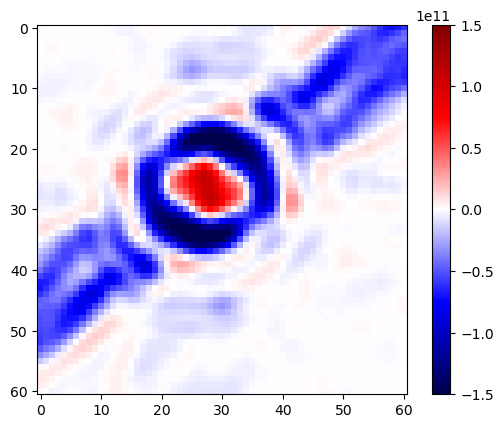

In [9]:
plt.imshow(sim[17] - np.fliplr(sim[23]), cmap='seismic', vmax=1.5e11, vmin=-1.5e11)
plt.colorbar()

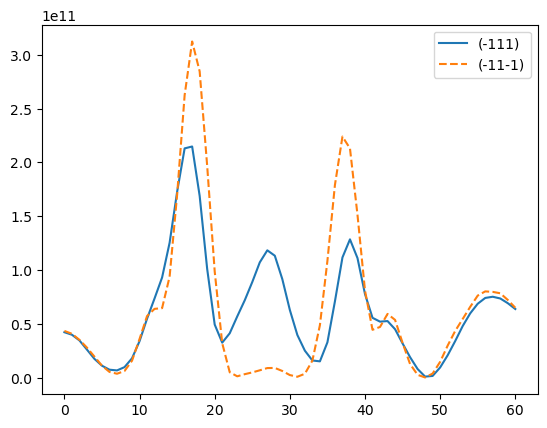

In [10]:
plt.plot(sim[17,25], label='(-111)')
plt.plot(np.fliplr(sim[23])[25], '--',label='(-11-1)')
plt.legend()

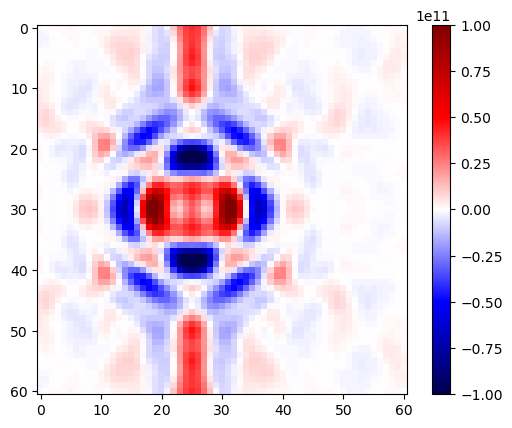

In [11]:
plt.imshow(sim[18] - np.fliplr(sim[30]), cmap='seismic', vmax=1e11, vmin=-1e11)
plt.colorbar()

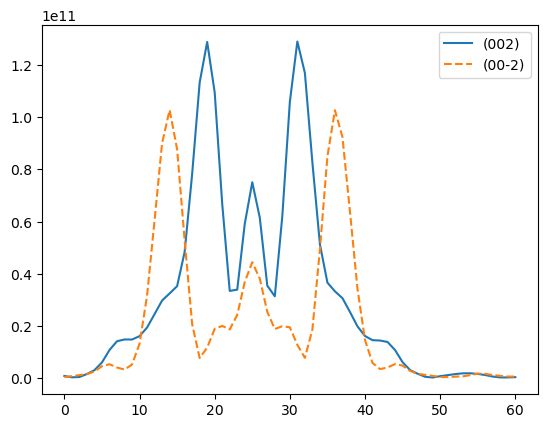

In [12]:
plt.plot(sim[18,30], label='(002)')
plt.plot(np.fliplr(sim[30])[30], '--',label='(00-2)')
plt.legend()

C:\Users\hcni2\AppData\Local\Temp\ipykernel_18256\248695681.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.figure(figsize=(3,3)), plt.gca()


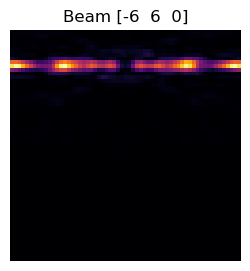

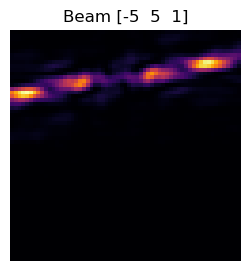

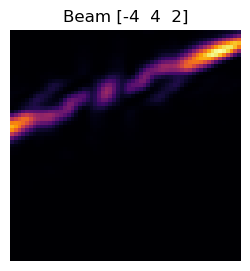

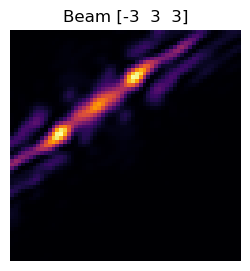

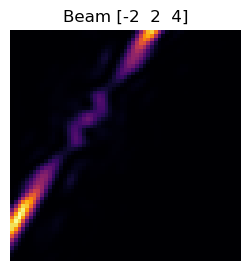

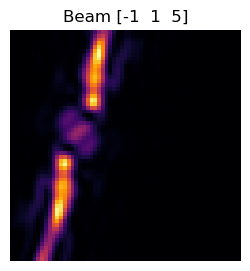

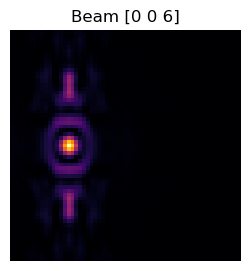

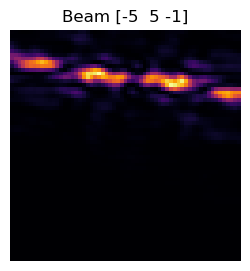

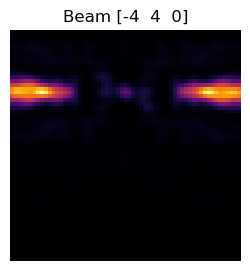

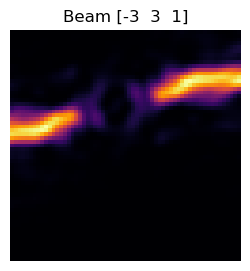

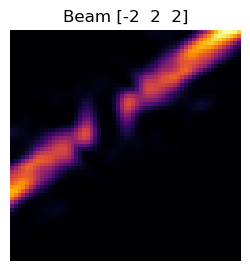

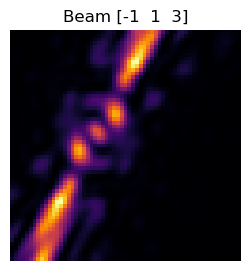

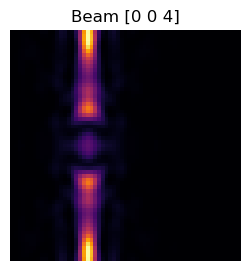

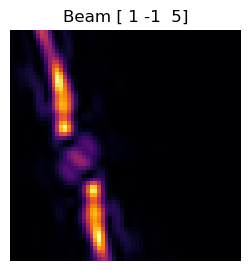

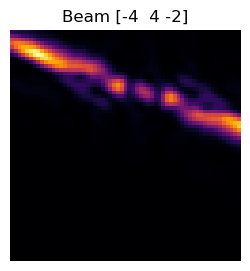

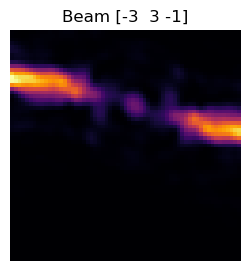

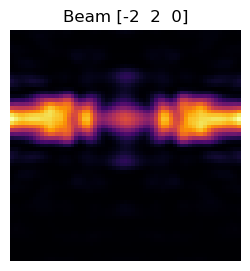

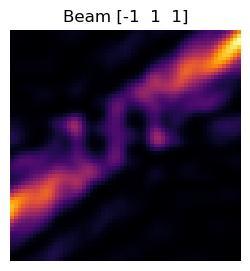

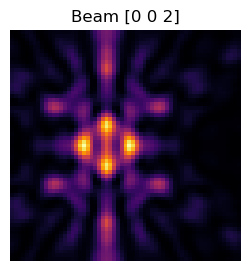

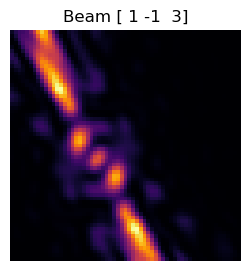

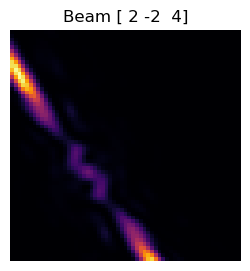

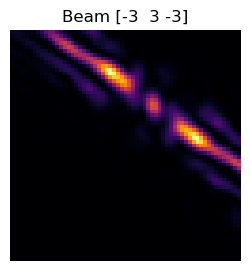

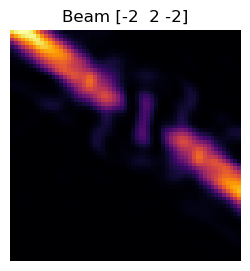

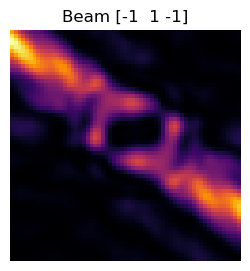

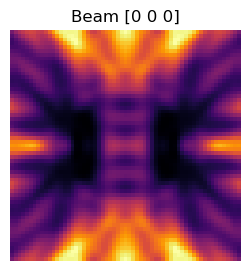

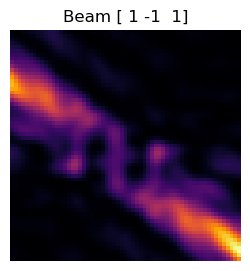

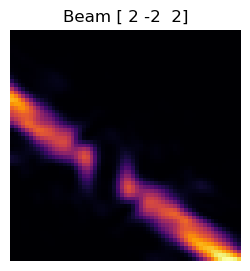

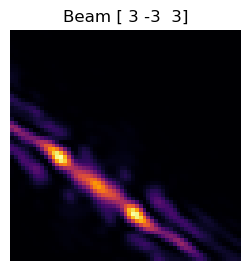

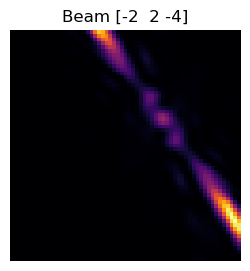

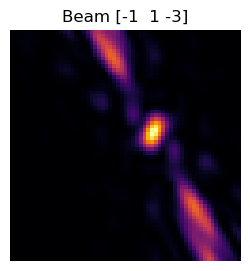

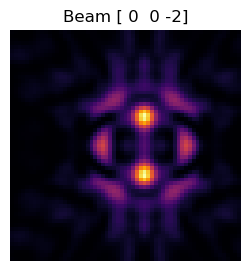

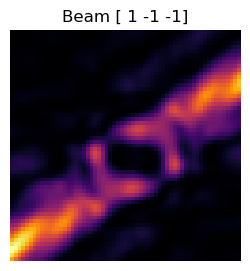

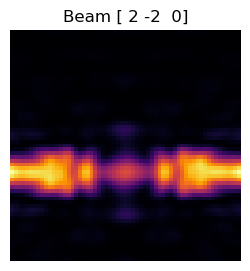

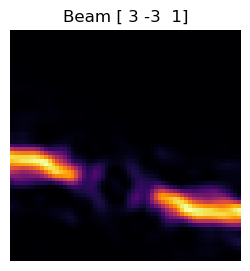

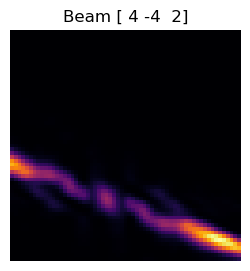

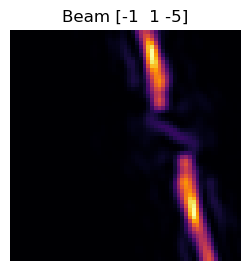

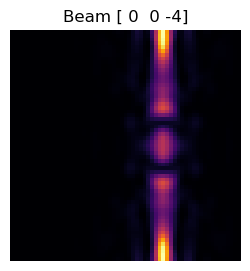

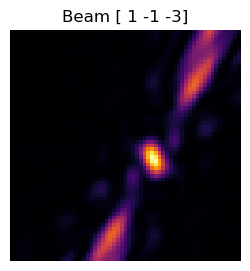

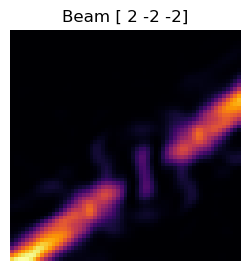

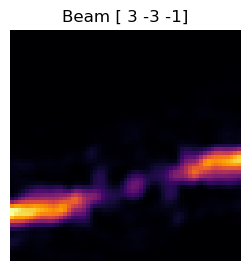

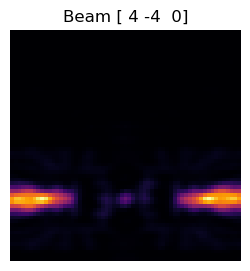

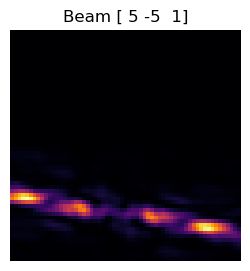

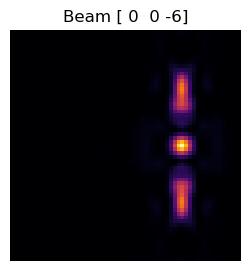

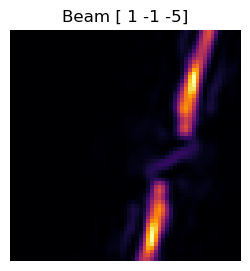

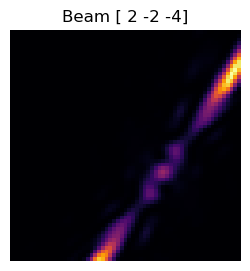

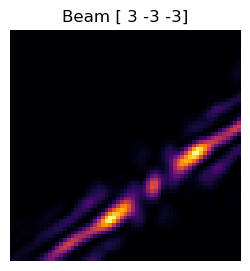

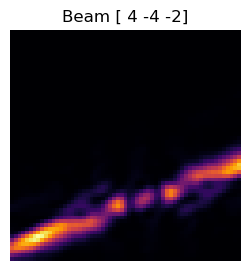

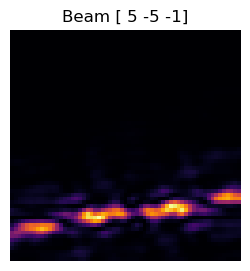

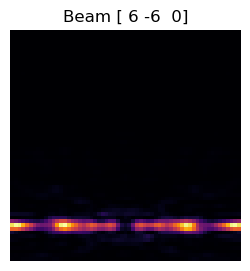

In [13]:
for i in range(sim.shape[0]):
    fig, ax = plt.figure(figsize=(3,3)), plt.gca()
    ax.imshow(sim[i], cmap='inferno')
    ax.set_title(f'Beam {larbed.indices[i]}')
    ax.axis('off')  